# Principal Component Analysis using the Linear Autoencoders
## Self Made Blobs Dataset using sklearn

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [53]:
from sklearn.datasets import make_blobs

In [54]:
dataset = make_blobs(n_samples = 444, n_features=3, centers=2, random_state=44)

In [55]:
type(dataset)

tuple

In [56]:
len(dataset)

2

In [57]:
dataset

(array([[-2.14590534, -3.94629265,  3.06344976],
        [-4.75546227, -3.52798705,  3.33988536],
        [ 9.35821365, -7.16274102,  5.37719152],
        ...,
        [ 6.61812329, -6.42688474,  6.02093867],
        [-3.6576152 , -3.33501828,  1.55079252],
        [ 6.64167132, -7.62289341,  5.49145531]]),
 array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0,

In [58]:
# take the Data Features seperate and do the scaling simultaneously
# features -> data[0]
# labels -> data[1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[0])

In [59]:
print(scaled_data.shape)
scaled_data

(444, 3)


array([[0.20980118, 0.61974371, 0.41480597],
       [0.03055505, 0.6569163 , 0.44792683],
       [1.        , 0.33391503, 0.69202467],
       ...,
       [0.81178775, 0.39930667, 0.7691546 ],
       [0.10596434, 0.67406441, 0.23356843],
       [0.81340522, 0.29302374, 0.70571507]])

In [60]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]
len(data_x)

444

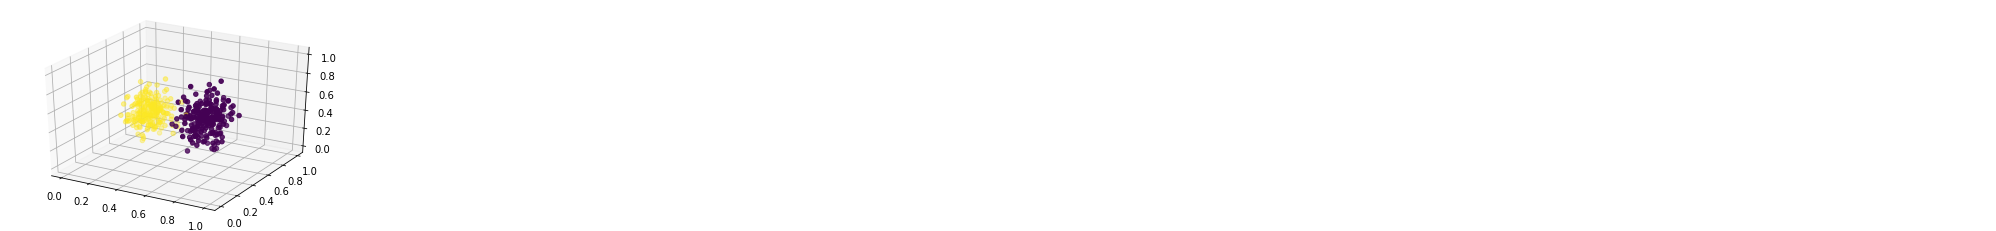

In [61]:
# visualizing the data first
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z, c = dataset[1])

# Now Dimensionality Reduction using the Tensorflow

In [62]:
num_inputs = 3
num_hidden = 2
num_output = 3

In [63]:
x = tf.placeholder(tf.float32,shape = (None,num_inputs))
m1 = tf.Variable(initial_value=tf.random_uniform(shape=(num_inputs,num_hidden)))
c1 = tf.Variable(tf.constant(1.0, shape = [num_hidden]))

In [64]:
z1 = tf.matmul(x,m1)
hidden = tf.add(z1,c1)

In [65]:
m2 = tf.Variable(initial_value=tf.random_uniform(shape=(num_hidden,num_output)))
c2 = tf.Variable(tf.constant(1.0, shape=[num_output]))

z2 = tf.matmul(hidden,m2)
output = tf.add(z2,c2)

In [66]:
# Loss Function
loss = tf.reduce_mean(tf.square(output-x))

In [67]:
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

train = optimizer.minimize(loss)

In [68]:
init = tf.global_variables_initializer()

In [72]:
with tf.Session() as sess:
    sess.run(init)
    
    num_steps = 1000000
    
    for _ in range(num_steps):
        sess.run(train, feed_dict= {x:scaled_data})
        
    output_2d = hidden.eval(feed_dict= {x:scaled_data})

In [73]:
output_2d

array([[-0.14228469,  0.57187784],
       [-0.35012925,  0.5258302 ],
       [ 0.6918398 ,  1.1573685 ],
       [ 0.6684333 ,  0.9996532 ],
       [ 0.5255132 ,  1.2313923 ],
       [-0.21995258,  0.5872294 ],
       [-0.03151795,  0.46414062],
       [ 0.5850321 ,  1.231693  ],
       [ 0.4760791 ,  0.9652151 ],
       [-0.1849049 ,  0.29727098],
       [-0.21883518,  0.34299904],
       [-0.26796675,  0.664886  ],
       [-0.25247413,  0.36934966],
       [-0.127379  ,  0.5384214 ],
       [-0.19621122,  0.4724542 ],
       [-0.18825409,  0.33415398],
       [ 0.6693138 ,  1.081333  ],
       [-0.2275675 ,  0.35254163],
       [ 0.01298338,  0.46761262],
       [ 0.74836445,  1.227725  ],
       [-0.33568203,  0.4749706 ],
       [ 0.7217818 ,  0.97679067],
       [ 0.7712302 ,  1.0662942 ],
       [ 0.7379099 ,  0.9712577 ],
       [ 0.74052054,  1.1071066 ],
       [-0.22181565,  0.3264973 ],
       [ 0.51664907,  0.9249755 ],
       [-0.20303023,  0.5202487 ],
       [-0.33328563,

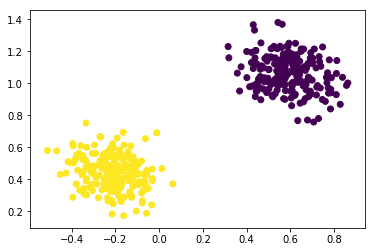

In [74]:
plt.scatter(output_2d[:,0], output_2d[:,1], c = dataset[1])